In [1]:
import seaborn as sns

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import squarify
import time
import os
from PIL import Image, ImageDraw
import imgkit
import joblib

--------

## 1. General

#### 1.1 Handling weird values
- Check decriptive statistics
- Check missing values

In [7]:
features_table = '/home/mosto/Documents/insight/kickstarter-project/features_with_state_1.pkl'

In [8]:
# Load table containing processed image features data
features = joblib.load(features_table)

In [ ]:
#Drop the states = 2

In [23]:
ksdf = features[features.state !=2]

In [24]:
ksdf.describe()

,image,dullness,brightness,average_pixel_width,average_red,average_green,average_blue,image_size,width,height,blurrness,state,pledged,goal,backers,staff_pick,launched_at,deadline,pledged_ratio
count,4827.000000,4816.000000,4816.000000,4827.000000,4827.000000,4827.000000,4827.000000,4.827000e+03,4827.000000,4827.000000,4827.000000,4827.000000,4.827000e+03,4.827000e+03,4.827000e+03,4820.000000,4.820000e+03,4.820000e+03,4827.000000
mean,103433.787238,23.442498,23.015813,2.638360,0.453060,0.477974,0.512464,3.517488e+05,1309.180236,741.166563,714.369429,0.595608,1.455470e+04,3.383846e+04,3.383846e+04,0.139627,1.468026e+09,1.470861e+09,8.555094
std,59965.465613,32.563777,32.429927,1.606658,0.227695,0.221191,0.222770,4.421389e+05,281.728492,154.304015,1302.080146,0.490825,8.031302e+04,5.176305e+05,5.176305e+05,0.346635,7.505398e+07,7.501499e+07,344.949066
min,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.266000e+03,218.000000,218.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,0.000000,1.247411e+09,1.250222e+09,0.000000
25%,51426.000000,0.000000,0.000000,1.415988,0.280990,0.317072,0.351952,1.207725e+05,1024.000000,576.000000,94.209451,0.000000,1.310000e+02,1.525000e+03,1.525000e+03,0.000000,1.413881e+09,1.416594e+09,0.027875
50%,102982.000000,3.512500,3.082500,2.360919,0.431062,0.465169,0.508067,2.020430e+05,1552.000000,873.000000,299.696610,1.000000,1.910000e+03,5.000000e+03,5.000000e+03,0.000000,1.462789e+09,1.465805e+09,1.025412
75%,155382.500000,42.600000,39.797500,3.558059,0.612346,0.631576,0.670090,3.459480e+05,1552.000000,873.000000,797.060621,1.000000,7.807000e+03,1.400000e+04,1.400000e+04,0.000000,1.531783e+09,1.534456e+09,1.267000
max,207963.000000,100.000000,100.000000,11.160414,1.000000,1.000000,1.000000,3.561173e+06,1552.000000,1176.000000,28280.366870,1.000000,2.966439e+06,3.000000e+07,3.000000e+07,1.000000,1.596225e+09,1.597274e+09,23036.067000


In [25]:
ksdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4827 entries, 0 to 4928
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                4827 non-null   int64  
 1   dullness             4816 non-null   float64
 2   brightness           4816 non-null   float64
 3   average_pixel_width  4827 non-null   float64
 4   average_color        4827 non-null   object 
 5   average_red          4827 non-null   float64
 6   average_green        4827 non-null   float64
 7   average_blue         4827 non-null   float64
 8   image_size           4827 non-null   int64  
 9   temp_size            4827 non-null   object 
 10  width                4827 non-null   int64  
 11  height               4827 non-null   int64  
 12  blurrness            4827 non-null   float64
 13  state                4827 non-null   int64  
 14  pledged              4827 non-null   float64
 15  goal                 4827 non-null   f

In [13]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [41]:
#Remove rows with null values
df = ksdf
df = df.dropna(how='any',axis=0)

In [52]:
# Add columns: pledged_ratio, aspect ratio
df['pledged_ratio'] = df['pledged']/ df['goal']
df['aspect_ratio'] = df['width']/ df['height']

In [55]:
X = df.loc[:,['dullness','brightness','average_pixel_width','average_red','average_green','average_blue','image_size','width','height','blurrness','aspect_ratio']]
y = df.state

In [56]:
print(X.shape)
print(y.shape)

(4809, 11)
(4809,)


In [57]:
ksdf.head()

,image,dullness,brightness,average_pixel_width,average_color,average_red,average_green,average_blue,image_size,temp_size,...,blurrness,state,pledged,goal,backers,staff_pick,launched_at,deadline,category,pledged_ratio
0,94899,0.00,60.88,0.768534,"[240.86637708875867, 212.18375311957465, 138.9...",0.944574,0.832093,0.545000,39944,"(1024, 576)",...,166.027659,0,60.00,5000.0,5000.0,0.0,1.302576e+09,1.306464e+09,Graphic Design,0.012000
1,162481,0.00,0.00,5.192227,"[118.4811774359809, 128.5906219482422, 125.515...",0.464632,0.504277,0.492219,165701,"(1024, 576)",...,791.188786,0,326.00,1000.0,1000.0,0.0,1.303708e+09,1.306300e+09,Electronic Music,0.326000
2,201573,0.00,0.00,5.105082,"[102.67853122287326, 92.08284335666232, 180.79...",0.402661,0.361109,0.708983,140637,"(1024, 576)",...,196.583446,0,215.00,500.0,500.0,0.0,1.578081e+09,1.580612e+09,Crochet,0.430000
3,159292,0.00,0.00,2.721759,"[75.76579604633861, 110.38401914242864, 143.18...",0.297121,0.432879,0.561527,250948,"(1552, 873)",...,24.676342,1,407.01,300.0,300.0,0.0,1.311861e+09,1.313108e+09,Conceptual Art,1.356700
4,68557,7.93,0.00,0.367261,"[89.36553211464201, 97.02202309254733, 109.570...",0.350453,0.380479,0.429687,963059,"(1552, 873)",...,2.093685,1,14041.00,12000.0,12000.0,1.0,1.401988e+09,1.405099e+09,World Music,1.170083


In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4928
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dullness             4809 non-null   float64
 1   brightness           4809 non-null   float64
 2   average_pixel_width  4809 non-null   float64
 3   average_red          4809 non-null   float64
 4   average_green        4809 non-null   float64
 5   average_blue         4809 non-null   float64
 6   image_size           4809 non-null   int64  
 7   width                4809 non-null   int64  
 8   height               4809 non-null   int64  
 9   blurrness            4809 non-null   float64
 10  aspect_ratio         4809 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 450.8 KB


In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')

In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(max_iter=10000), X, y, cv=5, scoring='accuracy').mean()

0.7080646242977149

In [61]:
y.value_counts(normalize=True)

1    0.595134
0    0.404866
Name: state, dtype: float64

Text(0.5, 0, 'Relative Feature Importance')

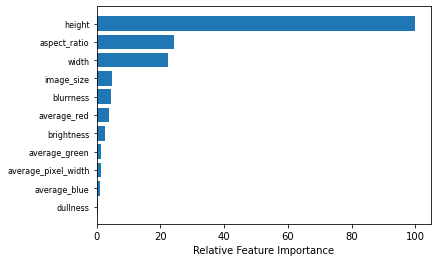

In [62]:
scaler = StandardScaler()
scaler.fit(X) 
X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

clf = LogisticRegression(random_state = 0)
clf.fit(X_scaled, y)

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

In [18]:
# dummy encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [19]:
ohe.fit_transform(df[['category_slug']])

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [20]:
ohe.categories_

[array(['art', 'comics', 'crafts', 'dance', 'design', 'fashion',
        'film & video', 'food', 'games', 'journalism', 'music',
        'photography', 'publishing', 'technology', 'theater'], dtype=object)]

In [28]:
X = df.loc[:,['days_to_deadline','goal','category_slug','blurb_length','month','day','backers_count']]

In [29]:
X.head()

,days_to_deadline,goal,category_slug,blurb_length,month,day,backers_count
0,42,2000.0,art,9,3,19,1
1,10,10.0,art,21,7,17,2
2,30,900.0,art,12,7,30,0
3,20,900.0,art,17,5,11,0
6,40,2900.0,art,9,4,6,2


In [30]:
# use when different features need different preprocessing
from sklearn.compose import make_column_transformer

In [31]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['category_slug']),
    remainder='passthrough')

In [32]:
column_trans.fit_transform(X)

array([[  1.,   0.,   0., ...,   3.,  19.,   1.],
       [  1.,   0.,   0., ...,   7.,  17.,   2.],
       [  1.,   0.,   0., ...,   7.,  30.,   0.],
       ...,
       [  0.,   1.,   0., ...,   6.,  12.,  43.],
       [  0.,   1.,   0., ...,   6.,   7., 260.],
       [  0.,   1.,   0., ...,   6.,   4.,   7.]])

In [33]:
# chain sequential steps together
from sklearn.pipeline import make_pipeline

In [34]:
pipe = make_pipeline(column_trans, LogisticRegression(max_iter=10000))

In [35]:
# cross-validate the entire process
# thus, preprocessing occurs within each fold of cross-validation
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.8900947187878838

In [75]:
#Predicts on New Data
X_new = X.sample(1, random_state=99)
X_new

,days_to_deadline,goal,category_slug,blurb_length,month,day,backers_count
162385,24,1645.0,publishing,20,7,21,13


In [76]:
X_new.category_slug

162385    publishing
Name: category_slug, dtype: object

In [73]:
pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['category_slug'])])),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [61]:
p=np.array(pipe.predict(X_new))
p

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [54]:
#Validation 
X_new.index

Int64Index([289553, 408986, 380114, 100835, 424607, 407364, 127049, 266741,
            389791, 321194, 263960,    185, 365934, 212638,  50507, 407278,
            342036,  64756,  12084,  50314],
           dtype='int64')

In [60]:
v=np.array(df.loc[X_new.index].pledged_ratio)
v

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [65]:
np.sum(p!=v)

2

In [66]:
np.where(p!=v)

(array([ 6, 15]),)

In [ ]:
#let's look at the different categories
print(ksdf['category_name'].value_counts())

In [ ]:
print(ksdf['category_name'].value_counts().count())

In [ ]:
print(ksdf['category_slug'].value_counts().count())

In [ ]:
category_count=ksdf['category_name'].value_counts()
category_count

In [ ]:
#Make a copy df which will have the select categories encoded 
cat_encoded_ksdf=ksdf.copy()

In [ ]:
#encoding category_name
print('number of categories: '+str(ksdf['category_name'].value_counts().count()))
labels = ksdf['category_name'].astype('category').cat.categories.tolist()
replace_map_comp_cat = {'category_name' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
cat_encoded_ksdf.replace(replace_map_comp, inplace=True)
#print(replace_map_comp_cat)

In [ ]:
#encoding slug
print('number of categories: '+str(ksdf['category_slug'].value_counts().count()))
labels = ksdf['category_slug'].astype('category').cat.categories.tolist()
replace_map_comp_slug = {'category_slug' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
cat_encoded_ksdf.replace(replace_map_comp_slug, inplace=True)
print(replace_map_comp_slug)

In [ ]:
#encoding location_state
print('number of categories: '+str(ksdf['location_state'].value_counts().count()))
labels = ksdf['location_state'].astype('category').cat.categories.tolist()
replace_map_comp_loc = {'location_state' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
cat_encoded_ksdf.replace(replace_map_comp_loc, inplace=True)
#print(replace_map_comp_loc)

In [ ]:
#encoding binary_state .. success or failed
print('number of categories: '+str(ksdf['binary_state'].value_counts().count()))
labels = ksdf['binary_state'].astype('category').cat.categories.tolist()
replace_map_comp_state = {'binary_state' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
cat_encoded_ksdf.replace(replace_map_comp_state, inplace=True)
print(replace_map_comp_state)

In [ ]:
#Visualize Category Histogram of all campaigns 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(50,5))
category_count = ksdf['category_name'].value_counts()
sns.set(style="darkgrid")
chart=sns.barplot(category_count.index, category_count.values, alpha=1)
#sns.set(rc={'figure.figsize':(20,8.27)})
plt.title('Frequency Distribution of Categories')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Categories', fontsize=12)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
# Add pledged_ratio column
cat_encoded_ksdf['pledged_ratio'] = cat_encoded_ksdf['usd_pledged']/ cat_encoded_ksdf['goal_USD']

In [ ]:
table=cat_encoded_ksdf.info(verbose=True)

In [79]:
[publishing.dtype(object)]

NameError: name 'publishing' is not defined

In [ ]:
#Let's grab the column names we might care about
names=['pledged_ratio','usd_pledged','goal_USD','blurb_length','days_to_deadline','backers_count','month','day','hour','category_name','category_slug','location_state']

In [ ]:
cat_encoded_ksdf=ksdf.copy()
cat_encoded_ksdf.head()

In [ ]:
cat_encoded_ksdf.replace(replace_map_comp, inplace=True)

In [ ]:
cat_encoded_ksdf

In [ ]:
cat_encoded_ksdf.head()

In [ ]:
ksdf.isnull().sum()

In [ ]:
ksdf['backers_count'].max()

In [ ]:
ksdf['backers_count'].hist(range=[0, 100])


In [ ]:
ksdf['usd_pledged'].hist(range=[0,10000])

In [ ]:
ksdf['backers_count'].shape

According to the description of data:
- **usd pledged** -> USD conversion made by KS for the pledged value
- **usd_pledged_real** ->  USD conversion made by fixer.io api

We will use **usd_pledged_real** for further analysis

In [ ]:
# Check missing values in the column "name"
ksdf[pd.isnull(ksdf['name'])].index

In [ ]:
ksdf[ksdf.index == 14749]
#ksdf[ksdf.index == 51866]

In [ ]:
ksfailed=ksdf[ksdf['binary_state'] == 'failed']
ksfailed=ksfailed[ksfailed['currency'] == 'USD']
ksfailed.shape

In [ ]:
ksfailed=ksfailed[ksfailed['currency'] == 'USD']

In [ ]:
ksfailed.head()

In [ ]:
# Add pledged_ratio column
ksfailed['pledged_ratio'] = ksfailed['usd_pledged']/ ksfailed['goal_USD']

In [ ]:
ksfailed['pledged_ratio'].hist()

In [ ]:
ksfailed['pledged_ratio'].plot(kind= 'density')
plt.show()

In [ ]:
names=['pledged_ratio','usd_pledged','goal_USD','blurb_length','days_to_deadline','backers_count']

In [ ]:
len(names)

In [ ]:
data=ksfailed_analysis=ksfailed[['pledged_ratio','usd_pledged','goal_USD','blurb_length','days_to_deadline','backers_count','month','day','hour',]].copy()

In [ ]:
plt.figure(figsize=(50,50))
chart=pd.plotting.scatter_matrix(data)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#chart.set_yticklabels(chart.get_yticklabels(), rotation=90)
plt.show

In [ ]:
correlations = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

Even though there are some missing values in **name**, those are real projects. We will keep them.

In [ ]:
ksfailed['backers_count'].sort_values(ascending=False)

In [ ]:
ksfailed['backers_count'].plot(kind= 'density')
plt.show()

#### 1.2 Modify data columns
- According to previous cell, I will drop **usd pledged** columns
- Add **pledged_ratio** column that follows the rule:
 > pledged_ratio = usd_pledged_real/ usd_goal_real
- Retrieve **year** & **date** and transform the information as a new column **time** that follows the rule:
> `(year - 2009) * 12 + month`
>>Since 2009 seems to be the first year that contains meaningful data, we will use this alorithm to get timely manner information
- Generate a new dataframe **ksdf_year** for cross-year comparison

In [ ]:
# Delete usdf pledged column
ksdf.drop(['usd pledged'], axis = 1, inplace = True)

In [ ]:
# Add pledged_ratio column
ksdf['pledged_ratio'] = ksdf['usd_pledged_real']/ ksdf['usd_goal_real']

In [ ]:
def year_cut(string):
    return string[0:4]

def month_cut(string):
    return string[5:7]

ksdf['year'] = ksdf['launched_at'].apply(year_cut)
ksdf['month'] = ksdf['launched_at'].apply(month_cut)

ksdf['year'] = ksdf['year'].astype(int)
ksdf['month'] = ksdf['month'].astype(int)
ksdf['time'] = (ksdf['year'].values - 2009)*12 + (ksdf['month']).astype(int)

In [ ]:
print (ksdf.columns)

In [ ]:
ksdf['year'].value_counts()

In [ ]:
ksdf_year = {}
for year in range(2009, 2020):
    ksdf_year[year] = ksdf[ksdf['year'] == year]['year'].count()

In [ ]:
ksdf_year = pd.Series(ksdf_year)
ksdf_year = pd.DataFrame(ksdf_year)
ksdf_year = ksdf_year.rename(columns = {0: "counts"})
ksdf_year

#### 1.3 Number of projects proposed/  successful rate
- Overall number of proposed projects
- Overall successful rate
- Cross year comparison of above 2 items

In [ ]:
ksdf['binary_state'].value_counts()

In [ ]:
total=np.sum(ksdf['binary_state'].value_counts())
total

In [ ]:
f_ratio=ksdf['binary_state'].value_counts()[0]/total
s_ratio=ksdf['binary_state'].value_counts()[1]/total

In [ ]:
plt.pie(ksdf['binary_state'].value_counts(),labels=['Failed '+str(np.round(f_ratio*100,1))+'%','Successful '+str(np.round(s_ratio*100,1))+'%'])
plt.savefig('pie.png')

In [ ]:
173721/430938

In [ ]:
squarify.plot(sizes=[197719,133956, (38779 + 3562 + 2799 + 1846)], 
              label=["Failed (52.22%)", "Successful (35.38%)", "Others (10.24%)",], color=["blue","red","green"], alpha=.4 )
plt.title('State of Campaigns 2009-2017', fontsize = 20)
plt.axis('off')
plt.show()

In [ ]:
success_timely = []

for year in range(2009, 2019):
    success = len (ksdf[(ksdf['year'] == year) & (ksdf['state'] == 'successful')]['state'])
    overall = len (ksdf[ksdf['year'] == year]['year'])
    ratio = success/ overall
    success_timely.append(ratio)
    print ("Year = ",year, ratio * 100, '%')

In [ ]:
failed_timely = []

for year in range(2009, 2019):
    success = len (ksdf[(ksdf['year'] == year) & (ksdf['state'] == 'failed')]['state'])
    overall = len (ksdf[ksdf['year'] == year]['year'])
    ratio = success/ overall
    success_timely.append(ratio)
    print ("Year = ",year, ratio * 100, '%')

In [ ]:
ksdf[ksdf['year'] == 2018]['state'].value_counts()

In [ ]:
ksdf_year['success_ratio'] = success_timely
ksdf_year.head

In [ ]:
ksdf[ksdf['year'] == 2017]['backers'].count()

In [ ]:
backers_year = {}
for year in range(2009, 2019):
    backers_count = ksdf[ksdf['year'] == year]['backers'].sum()
    backers_year[year] = backers_count

ksdf_year['backers'] = pd.Series(backers_year)

In [ ]:
ksdf_year

In [ ]:
# Cross-year proposed projects
sns.set_style("whitegrid")
sns.barplot(ksdf_year['counts'].index, y= ksdf_year['counts'] ,
            palette="Blues_d", saturation = 0.5)
sns.despine(right = True, top = True)

In [ ]:
# Cross-year success ratio
sns.set_style("whitegrid")
sns.barplot(ksdf_year['success_ratio'].index, y= ksdf_year['success_ratio'], data = ksdf_year,
            palette="Blues_d", saturation = 0.5)
sns.despine(right = True, top = True)

In [ ]:
sns.set_style("whitegrid")
sns.barplot(ksdf_year['backers'].index, y= ksdf_year['backers'] ,
            palette="Blues_d", saturation = 0.5)
sns.despine(right = True, top = True)

#### 1.4 Statistics of pledged amount
- Descripitive statistics of pledged amount
- Pledged amount comparison by state (successful/ failed/ others)

In [ ]:
sum_pledged = ksdf['usd_pledged_real'].sum()
print (sum_pledged)

In [ ]:
ksdf['usd_pledged_real'].describe()

In [ ]:
# Ratio of successful/ failed / others
success_pledged = ksdf[ksdf['state'] == "successful"]['usd_pledged_real'].sum()
fail_pledged = ksdf[ksdf['state'] == 'failed']['usd_pledged_real'].sum()
others_pledged = (ksdf[ksdf['state'] == 'canceled']['usd_pledged_real'].sum() +
                  ksdf[ksdf['state'] == 'undefined']['usd_pledged_real'].sum() +
                  ksdf[ksdf['state'] == 'live']['usd_pledged_real'].sum() +
                  ksdf[ksdf['state'] == 'suspended']['usd_pledged_real'].sum())

print (success_pledged, success_pledged/ sum_pledged * 100, '%')
print (fail_pledged, fail_pledged/ sum_pledged * 100, '%')
print (others_pledged, others_pledged/ sum_pledged * 100, '%')

In [ ]:
squarify.plot(sizes=[3036889045.99, 261108466.05, 132263736.79], 
              label=["Successful (88.53%)", "Failed (7.61%)", "Others (3.86%)",], color=["red","blue", "green"], alpha=.4 )
plt.title('Pledged Amount', fontsize = 20)
plt.axis('off')
plt.show()

In [ ]:
success_projects = ksdf[ksdf['state'] == 'successful']['state'].count()
fail_projects  = ksdf[ksdf['state'] == 'failed']['state'].count()
others_projects  = (
    ksdf[ksdf['state'] == 'canceled']['state'].count() +
    ksdf[ksdf['state'] == 'live']['state'].count() +
    ksdf[ksdf['state'] == 'undefined']['state'].count() +
    ksdf[ksdf['state'] == 'suspended']['state'].count())

print ("Average pledged amount per successful project = ",success_pledged/success_projects)
print ("Average pledged amount per failed project = ",fail_pledged/ fail_projects)
print ("Average pledged amount per other project = ",others_pledged/ others_projects)

In [ ]:
sns.set_style("whitegrid")
sns.barplot(["Successful", "Failed", "Others"],
            y= [22670.7952312, 1320.60381678, 2814.96055825],
            palette = "Set1",
            saturation = 0.5)
sns.despine(right = True, top = True)

## 2. Region
- 2.1 Projects proposed across regions

In [ ]:
ksdf['country'].unique()

In [ ]:
ksdf['country'].value_counts()

In [ ]:
sns.countplot(ksdf['country'], palette = 'Set1', order = ksdf['country'].value_counts().index)
sns.despine(bottom = True, left = True)

In [ ]:
us = ksdf[ksdf['country'] == "US"]['country'].count()
print (us/len(ksdf['country']) * 100, "%")


## 3. Caterogy
* 3.1 Projects proposed across categories
* 3.2 Pledged amount across categories
* 3.3 Success rate across categories

We will go through this part by creating a new dataframe **cate_df** to record some information, including:
- **pledged_sum** -> Sum of the pledged money for each categories
- **count** -> Project counts for each categories
- **average_amount** -> Average pledged amount for each categories 
- **success_count** -> Successful projects counts for each categories
- **success_rate** -> The ratio of success for each categories

Adding **pledged_sum**

In [ ]:
pledged_sum = {}
for category in list(set(ksdf['main_category'])):
    amount = ksdf[ksdf['main_category'] == category]['usd_pledged_real'].sum()
    pledged_sum[category] = amount

# Create dataframe
cate_df = pd.Series(pledged_sum)
cate_df = pd.DataFrame(cate_df)
cate_df = cate_df.rename(columns = {0:"pledged_sum"})

cate_df.head()

Adding **count**

In [ ]:
cate_count = {}
for category in list(set(ksdf['main_category'])):
    count = ksdf[ksdf['main_category'] == category]['main_category'].count()
    cate_count[category] = count
    
cate_df['count'] = pd.Series(cate_count)

cate_df.head()

Adding **average_amount**

In [ ]:
cate_df['average_amount'] = cate_df['pledged_sum']/ cate_df['count']
cate_df.head()

Adding **success_rate**

In [ ]:
success = {}
for category in list(set(ksdf['main_category'])):
    success_count = len(ksdf[(ksdf['main_category'] == category) & 
         (ksdf['state'] == "successful")])
    success[category] = success_count

cate_df["success_count"] = pd.Series(success)
cate_df.head()

In [ ]:
cate_df["success_rate"] = cate_df['success_count']/ cate_df['count']
cate_df.head()

In [ ]:
# pledged_sum plot
cate_df = cate_df.sort_values('pledged_sum',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['pledged_sum'].index, y= cate_df['pledged_sum'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

In [ ]:
# avarage amount plot
cate_df = cate_df.sort_values('average_amount',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['average_amount'].index, y= cate_df['average_amount'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

In [ ]:
# count plot
cate_df = cate_df.sort_values('count',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['count'].index, y= cate_df['count'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

In [ ]:
# success rate plot
cate_df = cate_df.sort_values('success_rate',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['success_rate'].index, y= cate_df['success_rate'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

## 4. Backers
* 4.1 Discover categories that attract most backers
* 4.2 The distribution of backers
* 4.3 Relationship between backers & pledged amounts

In [ ]:
back_cate = {}

for category in set(ksdf['main_category']):
    backers = ksdf[ksdf['main_category'] == category]['backers'].sum()
    back_cate[category] = backers

backers = pd.Series(back_cate)
cate_df['backers'] = backers

In [ ]:
cate_df = cate_df.sort_values('backers',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['backers'].index, y= cate_df['backers'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

In [ ]:
ksdf['backers'].quantile(list(np.arange(0,1,0.01))).plot(grid = 0, color = '#055968')

In [ ]:
sns.set_style("whitegrid")
sns.kdeplot(ksdf['backers'])
sns.despine(right = True, top = True)

### 5. Modeling
* 5.1 Backers & pledged amount - `Linear Regression`
    - Use **backers** to predict **usd_pledged_real**
    - Retrieve projects that are not zero-pledged
    - Model
        - Input (X): **backers** (logarithm)
        - Output (Y): **usd_pledged_real** (logarithm)
        - Loss estimation: mean squared error
* 5.2 Project state prediction - `Random Forest`
- Data processing
    - Encode **state** column to binary:
        - successful -> 1
        - failed -> 0
        - else -> delete
    - Concatenate new data set: `ksdf_rf`
        - **main_category**
        - **time** 
        - **state**
    - Data Split:
        - train 70%
        - test 30%
    - Define X and Y
        - X:
            - category (one-hot)
            -  main_category (one-hot)
            - time
        - Y:
            - success/ failed (1/0)

In [ ]:
# Select not zero-pledged projects
non_zero = ksdf[ksdf['usd_pledged_real'] != 0]
print (non_zero.shape)

In [ ]:
# Define X and Y
X = ksdf[ksdf['usd_pledged_real'] != 0]['backers'].values
Y = ksdf[ksdf['usd_pledged_real'] != 0]['usd_pledged_real'].values

print (X.shape)
print (Y.shape)

In [ ]:
X = X.reshape(326134,1)
Y = Y.reshape(326134,1)

In [ ]:
# Model fitting and visualization
regr = linear_model.LinearRegression()
regr.fit(np.log(X+1), np.log(Y+1))

plt.scatter(np.log(X+1), np.log(Y+1))
plt.plot(np.log(X+1), regr.predict(np.log(X+1)), color='red', linewidth=3)
plt.show()

In [ ]:
# Results: error and parameters

Y_pred = regr.predict(np.log(X+1))
Y_true = np.log(Y+1)

print ("error = ", sklearn.metrics.mean_squared_error(Y_true, Y_pred))
print ("coefficient = ", regr.coef_)
print ("intercept = ", regr.intercept_)

Encode **state** column to binary
* successful -> 1
* failed -> 0
* else -> delete

In [ ]:
print (ksdf['state'].value_counts())
print ('')
print ("ksdf.shape = ", ksdf.shape)

In [ ]:
def state_change(cell_value):
    if cell_value == 'successful':
        return 1
    
    elif cell_value == 'failed':
        return 0
    
    else:
        return 'del'

In [ ]:
ksdf['state'] = ksdf['state'].apply(state_change)
print (ksdf[ksdf['state'] == 1].shape)
print (ksdf[ksdf['state'] == 0].shape)
print (ksdf[ksdf['state'] == 'del'].shape)
print (ksdf[ksdf['state'] == 1].shape[0] + ksdf[ksdf['state'] == 0].shape[0])

Concatenate new DataFrame
* **main_category**
* **time** 
* **state**

In [ ]:
ksdf_rf = ksdf.drop(ksdf[ksdf['state'] == 'del'].index)
print (ksdf_rf.shape)

In [ ]:
ksdf_rf = pd.concat([
                  ksdf_rf['main_category'],
                  ksdf_rf['time'],
                  ksdf_rf['state']], axis = 1
                 )

print (ksdf_rf.shape)

Data Split:
* Train: 70%
* Test: 30%

In [ ]:
train, test = sklearn.model_selection.train_test_split(ksdf_rf, test_size = 0.3, random_state = 42)

print ("Train shape = ", train.shape, ",", len(train)/ len(ksdf_rf) * 100, "%")
print ("Test shape = ", test.shape, ",", len(test)/ len(ksdf_rf) * 100, "%")

Define X and Y

In [ ]:
X_train = pd.concat(
    [
     pd.get_dummies(train['main_category'], prefix = 'main_category'),
     train["time"]
    ], axis=1)

Y_train = train['state']

In [ ]:
X_test = pd.concat(
    [
     pd.get_dummies(test['main_category'], prefix = 'main_category'),
     test["time"]
    ], axis=1)

Y_test = test['state']

In [ ]:
X_train = X_train.astype(int)
Y_train = Y_train.astype(int)
X_test = X_test.astype(int)
Y_test = Y_test.astype(int)

print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

Random Forest

In [ ]:
for_record = {
    'baseline':{},
    'best_random1':{},
    'best_random2':{},
    'best_random3':{},
    'grid1':{},
    'grid2':{}
}

In [ ]:
start = time.time()
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, Y_train)
end = time.time()
sec = end - start
Y_pred = rf.predict(X_train)

In [ ]:
for_record['baseline']['params'] = rf.get_params()
for_record['baseline']['time'] = sec
for_record['baseline']["train_score"] = rf.score(X_train, Y_train)
for_record['baseline']['f1'] = f1_score(Y_train, Y_pred, average = 'weighted')
for_record['baseline']['test_score'] = rf.score(X_test, Y_test)

Randomized Search 1

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(2, 100, 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(2,50,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_rand1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random1 = RandomizedSearchCV(estimator = rf, param_distributions = param_rand1, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random1.fit(X_train, Y_train)

# Use best random parameters to train a new model
start = time.time()
rf_rand1 = RandomForestClassifier(bootstrap = rf_random1.best_params_['bootstrap'],
                                 max_depth = rf_random1.best_params_['max_depth'],
                                 max_features = rf_random1.best_params_['max_features'],
                                 min_samples_leaf = rf_random1.best_params_['min_samples_leaf'],
                                 min_samples_split = rf_random1.best_params_['min_samples_split'],
                                 n_estimators = rf_random1.best_params_['n_estimators'],
                                 random_state = 42, n_jobs = -1)

rf_rand1.fit(X_train, Y_train)
end = time.time()
rand1_time = end - start
Y_pred = rf_rand1.predict(X_train)

for_record['best_random1']['params'] = rf_rand1.get_params()
for_record['best_random1']['time'] = rand1_time
for_record['best_random1']["train_score"] = rf_rand1.score(X_train, Y_train)
for_record['best_random1']['f1'] = f1_score(Y_train, Y_pred, average = 'weighted')
for_record['best_random1']['test_score'] = rf_rand1.score(X_test, Y_test)

Grid Search 1

In [ ]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in range(55, 65, 2)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in range(2, 20, 2)]
# # Minimum number of samples required to split a node
# min_samples_split = [2,5,10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1,2,4]
# # Method of selecting samples for training each tree
# bootstrap = [True,False]
# # Create the random grid
# param_grid1 = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_grid1 = GridSearchCV(estimator = rf, param_grid = param_grid1, cv = 3, verbose=2, n_jobs = -1)
# # Fit the random search model
# rf_grid1.fit(X_train, Y_train)

# # Use best random parameters to train a new model
# start = time.time()
# rf_grid1 = RandomForestClassifier(bootstrap = rf_grid1.best_params_['bootstrap'],
#                                  max_depth = rf_grid1.best_params_['max_depth'],
#                                  max_features = rf_grid1.best_params_['max_features'],
#                                  min_samples_leaf = rf_grid1.best_params_['min_samples_leaf'],
#                                  min_samples_split = rf_grid1.best_params_['min_samples_split'],
#                                  n_estimators = rf_grid1.best_params_['n_estimators'],
#                                  random_state = 42, n_jobs = -1)

# rf_grid1.fit(X_train, Y_train)
# end = time.time()
# grid1_time = end - start
# Y_pred = rf_grid1.predict(X_train)

# for_record['grid1']['params'] = rf_grid1.get_params()
# for_record['grid1']['time'] = grid1_time
# for_record['grid1']["train_score"] = rf_grid1.score(X_train, Y_train)
# for_record['grid1']['f1'] = f1_score(Y_train, Y_pred, average = 'weighted')
# for_record['grid1']['test_score'] = rf_grid1.score(X_test, Y_test)

Randomized Search 2

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(100, 200, 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(50,100,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_random2 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random2 = RandomizedSearchCV(estimator = rf, param_distributions = param_random2, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random2.fit(X_train, Y_train)

# Use best random parameters to train a new model
start = time.time()
rf_rand2 = RandomForestClassifier(bootstrap = rf_random2.best_params_['bootstrap'],
                                 max_depth = rf_random2.best_params_['max_depth'],
                                 max_features = rf_random2.best_params_['max_features'],
                                 min_samples_leaf = rf_random2.best_params_['min_samples_leaf'],
                                 min_samples_split = rf_random2.best_params_['min_samples_split'],
                                 n_estimators = rf_random2.best_params_['n_estimators'],
                                 random_state = 42, n_jobs = -1)

rf_rand2.fit(X_train, Y_train)
end = time.time()
rand2_time = end - start
Y_pred = rf_rand2.predict(X_train)
for_record['best_random2']['params'] = rf_rand2.get_params()
for_record['best_random2']['time'] = rand2_time
for_record['best_random2']["train_score"] = rf_rand2.score(X_train, Y_train)
for_record['best_random2']['f1'] = f1_score(Y_train, Y_pred, average = 'weighted')
for_record['best_random2']['test_score'] = rf_rand2.score(X_test, Y_test)

Grid Search 2

In [ ]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in range(100, 150, 2)]
# # Number of features to consider at every split
# max_features = 'auto'
# # Maximum number of levels in tree
# max_depth = [int(x) for x in range(2, 20, 2)]
# # Minimum number of samples required to split a node
# min_samples_split = 5
# # Minimum number of samples required at each leaf node
# min_samples_leaf = 2
# # Method of selecting samples for training each tree
# bootstrap = False
# # Create the random grid
# param_grid1 = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

Randomized Search 3

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(201, 300, 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(100,150,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_random3 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random3 = RandomizedSearchCV(estimator = rf, param_distributions = param_random3, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random3.fit(X_train, Y_train)

# Use best random parameters to train a new model
start = time.time()
rf_rand3 = RandomForestClassifier(bootstrap = rf_random3.best_params_['bootstrap'],
                                 max_depth = rf_random3.best_params_['max_depth'],
                                 max_features = rf_random3.best_params_['max_features'],
                                 min_samples_leaf = rf_random3.best_params_['min_samples_leaf'],
                                 min_samples_split = rf_random3.best_params_['min_samples_split'],
                                 n_estimators = rf_random3.best_params_['n_estimators'],
                                 random_state = 42, n_jobs = -1)

rf_rand3.fit(X_train, Y_train)
end = time.time()
rand3_time = end - start
Y_pred = rf_rand3.predict(X_train)
for_record['best_random3']['params'] = rf_rand3.get_params()
for_record['best_random3']['time'] = rand3_time
for_record['best_random3']["train_score"] = rf_rand3.score(X_train, Y_train)
for_record['best_random3']['f1'] = f1_score(Y_train, Y_pred, average = 'weighted')
for_record['best_random3']['test_score'] = rf_rand3.score(X_test, Y_test)

In [ ]:
print (for_record['best_random1']['test_score'])
print (for_record['best_random2']['test_score'])
print (for_record['best_random3']['test_score'])